## ***Notebook: Evaluation And Results***

In [29]:
import pandas as pd
import evaluate
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data_dir = '../FinalDataset'
rslt_dir = '../models&results'

#loading the test set 
try:
    test_df = pd.read_csv(os.path.join(data_dir,'testFinal.csv'))
except Exception as e:
    print("Error: test data not loaded")
    raise e

In [31]:
#loading the results from each experiment
experiment_files = {"BART (emotion)":os.path.join(rslt_dir,'bart_finetuned_with_emotion_summaries.csv'),
                    "BART (no emotion)":os.path.join(rslt_dir,'bart_finetuned_without_emotion_summaries.csv'),
                    "LLM (zero-shot)":os.path.join(rslt_dir,'llm_zero_shot_summaries.csv'),
                    "LLM (RAG)":  os.path.join(rslt_dir,'llm_rag_summaries.csv')}

rslts  = {"Ground Truth":test_df[['conv_id','target_summary']].rename(columns={'target_summary':'summary'})}
for name, path in experiment_files.items():
    try:
        rslts[name] = pd.read_csv(path).rename(columns={'generated_summary':'summary'})
        print(f"loaded reuslts for :{name}")
    except Exception as e:
        print(f"Error: result file not found for {name} as {path}")
        raise e

loaded reuslts for :BART (emotion)
loaded reuslts for :BART (no emotion)
loaded reuslts for :LLM (zero-shot)
loaded reuslts for :LLM (RAG)


In [32]:
final_df = rslts['Ground Truth'].copy()
final_df.rename(columns={'summary':'refrence_summary'},inplace=True)

final_df.head()

,conv_id,refrence_summary
0,hit:5_conv:11,I was at work_comma_ and my coworker was calle...
1,hit:18_conv:37,I ordered for French fries _comma_bit was serv...
2,hit:21_conv:43,There were times where I was being seduced by ...
3,hit:24_conv:49,When I was little and I found out that we were...
4,hit:28_conv:57,I had a co-worker open at my jb and instead of...


In [33]:
final_df = rslts['Ground Truth'].copy()
final_df.rename(columns={'summary':'refrence_summary'},inplace=True)

for name,df in rslts.items():
    if name != "Ground. Truth":
        final_df = pd.merge(final_df, df, on='conv_id', how='left')
        final_df.rename(columns={'summary': f'summary_{name}'}, inplace=True)

final_df.columns

Index(['conv_id', 'refrence_summary', 'summary_Ground Truth',
       'target_summary_x', 'summary_BART (emotion)', 'target_summary_y',
       'summary_BART (no emotion)', 'summary_LLM (zero-shot)',
       'summary_LLM (RAG)'],
      dtype='object')

In [34]:
final_df = final_df.drop(['target_summary_x','summary_Ground Truth','target_summary_y'], axis=1)
final_df.head()

,conv_id,refrence_summary,summary_BART (emotion),summary_BART (no emotion),summary_LLM (zero-shot),summary_LLM (RAG)
0,hit:5_conv:11,I was at work_comma_ and my coworker was calle...,My coworker is allowed to work remotely_comma_...,My coworker is allowed to work remotely_comma_...,Speaker 10 expresses frustration and perceived...,I am jealous that my coworker gets to work rem...
1,hit:18_conv:37,I ordered for French fries _comma_bit was serv...,I could not tolerate the waiters insensitivity.,I could not tolerate the waiters insensitivity...,Here is a concise summary of the dialogue in a...,I'm here to help summarize emotionally sensiti...
2,hit:21_conv:43,There were times where I was being seduced by ...,There were times when I was being seduced by a...,There were times where I was being seduced by ...,"Here is a summary of the dialogue in a single,...",I've summarized emotionally sensitive conversa...
3,hit:24_conv:49,When I was little and I found out that we were...,When I was a little child my parents told me t...,When I was a little child my parents told me t...,The speaker reminisces about a happy childhood...,I went to an amusement park as a child with my...
4,hit:28_conv:57,I had a co-worker open at my jb and instead of...,There was a person who had to do twice the amo...,There was a person who had to do twice the amo...,Speaker 41 expresses furious frustration that ...,I'm ready to summarize the new dialogue!\n\nAf...



--- Calculating ROUGE and BERTScore for all models ---
Evaluating: BART (emotion)...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluating: BART (no emotion)...
Evaluating: LLM (zero-shot)...
Evaluating: LLM (RAG)...

--- Final Evaluation Scores ---
                   ROUGE-1  ROUGE-2  ROUGE-L  BERTScore-F1
Model                                                     
BART (emotion)       66.67    55.01    63.71         94.18
BART (no emotion)    66.33    54.56    63.38         94.13
LLM (zero-shot)      20.62     6.28    16.46         87.79
LLM (RAG)            42.69    26.89    38.05         90.13

--- Generating result visualizations ---


/var/folders/48/40cdcp9j2t55h9l2wgznkpgm0000gn/T/ipykernel_49223/3653776397.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=scores_df[metric], ax=ax[i], palette='viridis')
/var/folders/48/40cdcp9j2t55h9l2wgznkpgm0000gn/T/ipykernel_49223/3653776397.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=scores_df[metric], ax=ax[i], palette='viridis')
/var/folders/48/40cdcp9j2t55h9l2wgznkpgm0000gn/T/ipykernel_49223/3653776397.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=s

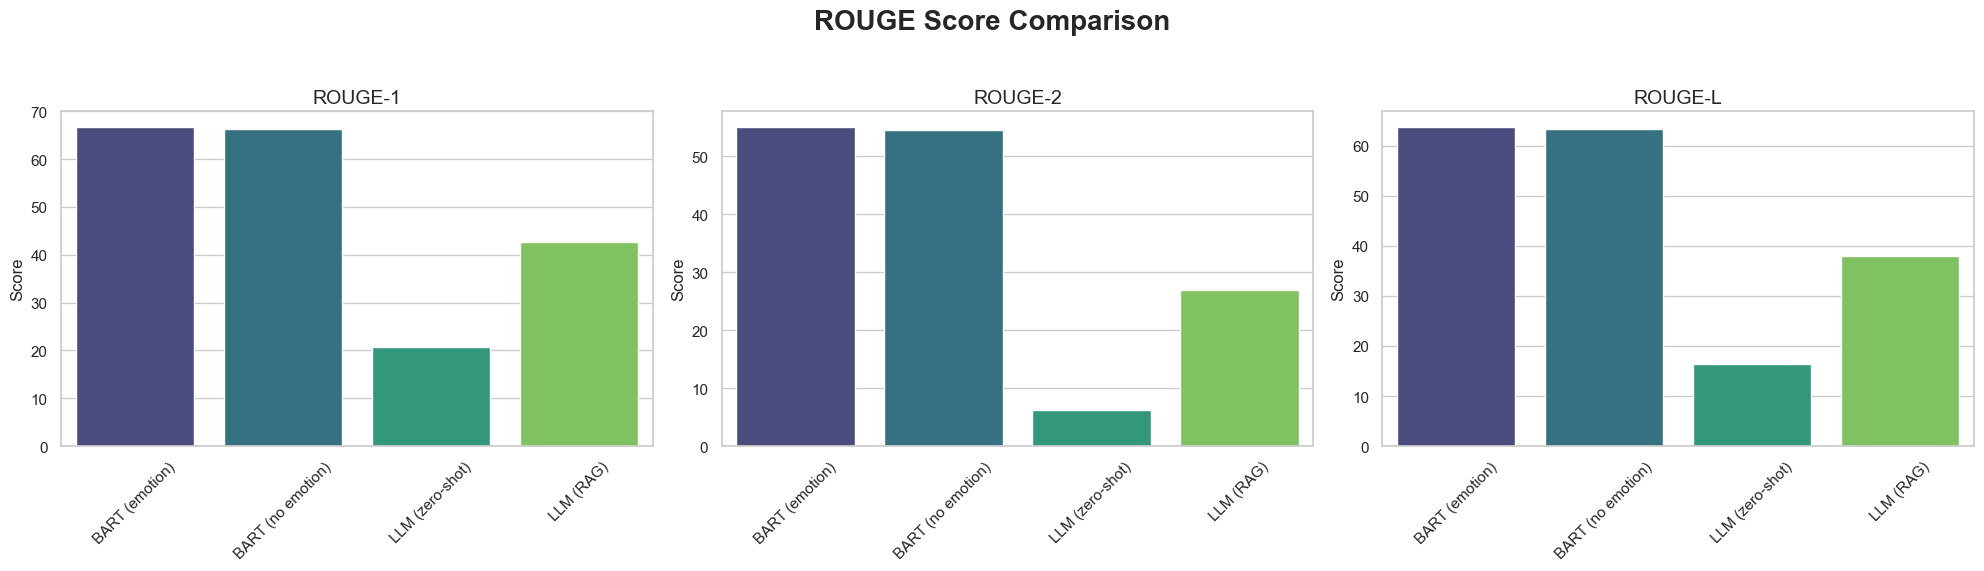

/var/folders/48/40cdcp9j2t55h9l2wgznkpgm0000gn/T/ipykernel_49223/3653776397.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores_df.index, y=scores_df['BERTScore-F1'], palette='plasma')


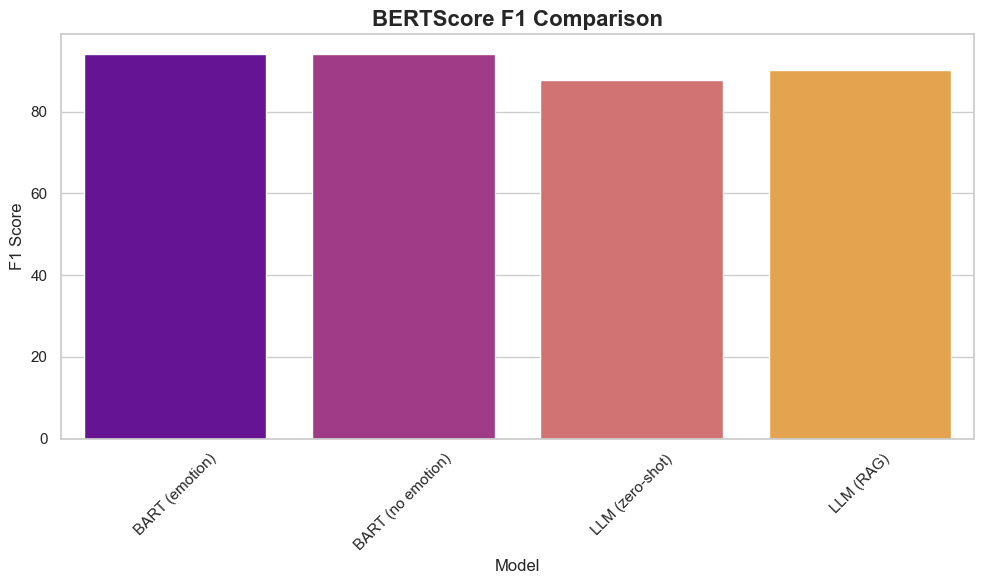

In [ ]:
print("\n--- Calculating ROUGE and BERTScore for all models ---")
rouge_metric = evaluate.load('rouge')
bertscore_metric = evaluate.load('bertscore')

evaluation_scores = []

#geting the list of models to evaluate
model_columns = [col for col in final_df.columns if col.startswith('summary_')]

for col in model_columns:
    model_name = col.replace('summary_', '')
    print(f"Evaluating: {model_name}...")
    
    #preparing lists of predictions and references
    predictions = final_df[col].tolist()
    references = final_df['refrence_summary'].tolist()
    
    #calculating ROUGE scores
    rouge_scores = rouge_metric.compute(predictions=predictions, references=references)
    
    #calculating BERTScore
    bert_scores = bertscore_metric.compute(predictions=predictions, references=references, lang="en")
    
    evaluation_scores.append({
        "Model": model_name,
        "ROUGE-1": rouge_scores['rouge1'] * 100,
        "ROUGE-2": rouge_scores['rouge2'] * 100,
        "ROUGE-L": rouge_scores['rougeL'] * 100,
        "BERTScore-F1": sum(bert_scores['f1']) / len(bert_scores['f1']) * 100
    })

#converting the scores to a DataFrame
scores_df = pd.DataFrame(evaluation_scores).set_index('Model')
scores_df = scores_df.round(2) # Round to 2 decimal places

print("\n--- Final Evaluation Scores ---")
print(scores_df)

print("\n--- Generating result visualizations ---")
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('ROUGE Score Comparison', fontsize=20, fontweight='bold')

metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
for i, metric in enumerate(metrics):
    sns.barplot(x=scores_df.index, y=scores_df[metric], ax=ax[i], palette='viridis')
    ax[i].set_title(metric, fontsize=14)
    ax[i].set_ylabel('Score')
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#ploting BERTScore
plt.figure(figsize=(10, 6))
sns.barplot(x=scores_df.index, y=scores_df['BERTScore-F1'], palette='plasma')
plt.title('BERTScore F1 Comparison', fontsize=16, fontweight='bold')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()